In [334]:
!pip3 install nltk


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [335]:
import nltk
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
 

In [336]:
df=pd.read_csv(r"/Users/prantobosu/Documents/movie-classification/Genre Classification Dataset/train_data.txt",sep=':::',names=["Movie_name","Gener","Description"],engine="python")

df.head(5)
df.describe()
df['Gener'].unique()
df['Gener'].value_counts()
df.info()
df=df[:14000]
df['Gener'].isnull().sum(),df['Description'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_name   54214 non-null  object
 1   Gener        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


(np.int64(0), np.int64(0))

([<matplotlib.patches.Wedge at 0x332308100>,
 [Text(0.7783408731955718, 0.7772936929585593, ' drama '),
  Text(-0.7578464077547891, 0.7972884184867871, ' thriller '),
  Text(-1.019912433085333, -0.41204202314564514, ' adult '),
  Text(-0.4876980014718093, -0.985977007521171, ' documentary '),
  Text(-0.04762522819280862, -1.0989685335074808, ' comedy '),
  Text(0.19106669176357727, -1.0832790588294976, ' crime '),
  Text(0.3714499095378242, -1.0353863842567868, ' reality-tv '),
  Text(0.509260757544074, -0.975014605442214, ' horror '),
  Text(0.6166571819126249, -0.9108973158350947, ' sport '),
  Text(0.7028767825920313, -0.8461466944289711, ' animation '),
  Text(0.7797347141382024, -0.7758954669076343, ' action '),
  Text(0.8464621239038461, -0.7024968845455403, ' fantasy '),
  Text(0.9006737455094288, -0.6314956881483966, ' short '),
  Text(0.9456835188780103, -0.561856460426063, ' sci-fi '),
  Text(0.9843296826695614, -0.49101433361526275, ' music '),
  Text(1.0147494817110592, -0.

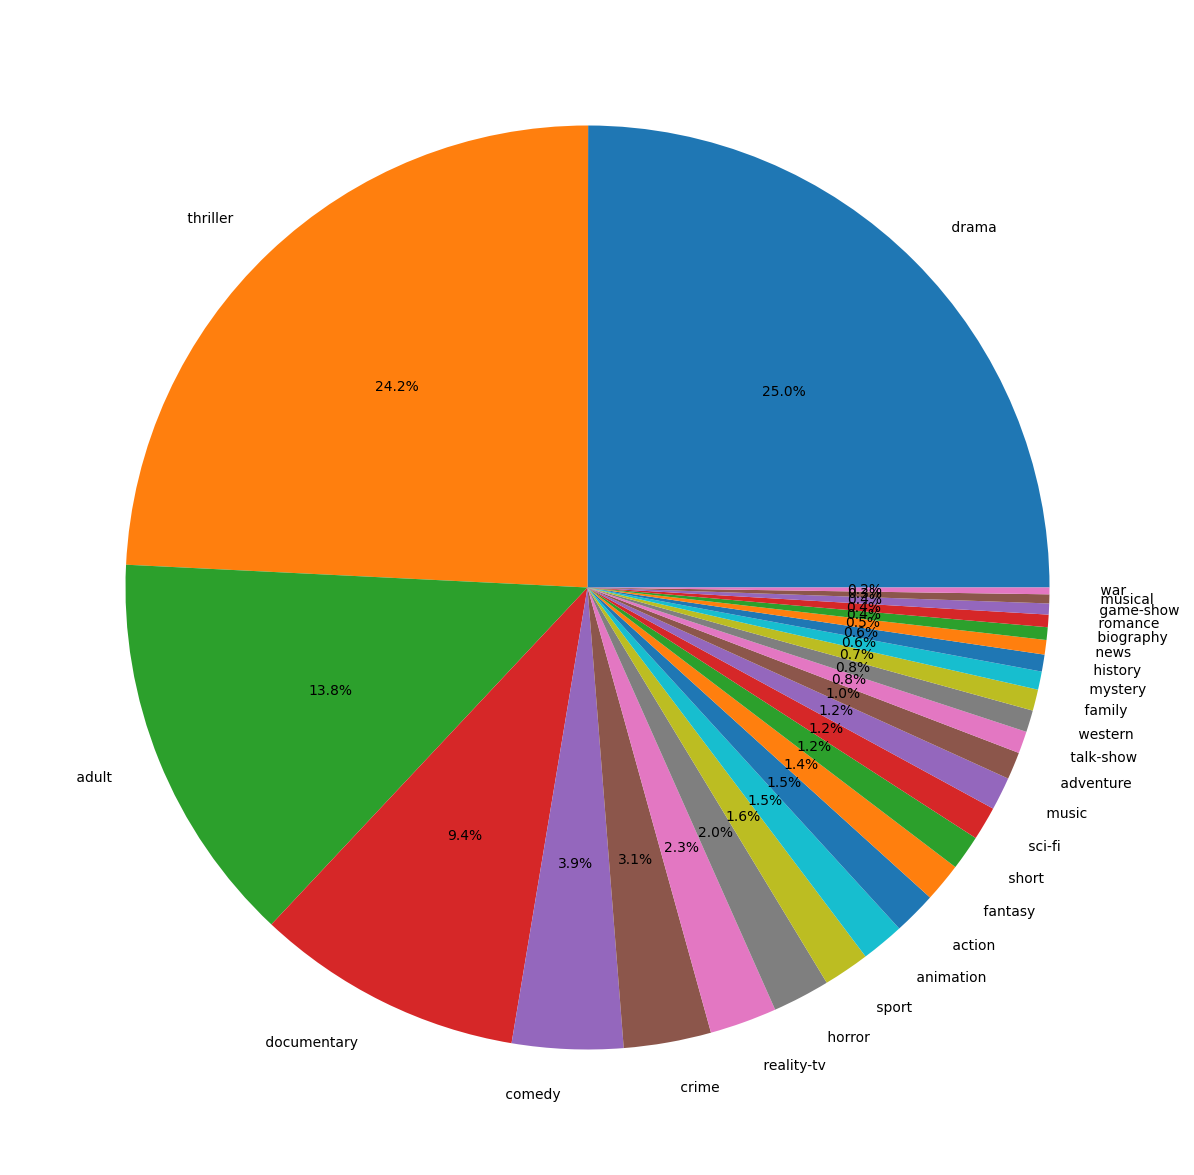

In [337]:
plt.figure(figsize=(15,15))
plt.pie(df['Gener'].value_counts(),labels=[' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '],autopct='%0.1f%%')

In [338]:
def remove_punct(text):
    import string as st
    punct=st.punctuation
    new_text=''.join([char for char in text if char not in punct])
    return new_text

df['Description']=df['Description'].apply(lambda x:remove_punct(x))

In [339]:
df.tail()


,Movie_name,Gener,Description
13996,Bridging the Gap: A Middle East Comedy Confer...,comedy,Hosted by Ahmed Ahmed and Avi Liberman Bridgi...
13997,Nieuw tiengemeten (2010),documentary,New Tiengemeten is the account of the transfo...
13998,That's What She Told Me (2011),short,A New York Artist accidentally summons the Gh...
13999,All Things Bakelite: The Age of Plastic (2016),documentary,All Things Bakelite a film by John Maher is a...
14000,Hanna D. - La ragazza del Vondel Park (1984),drama,Hanna is a girl completely abandoned to herse...


In [340]:
df['Description']=df['Description'].apply(lambda x:x.lower())

df.head()

,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the films title refers not only to the unreco...


In [341]:
def toknize(text):
    new_text=nltk.tokenize.word_tokenize(text,language='english')
    return new_text

In [342]:
from nltk import word_tokenize
import nltk

nltk.download('punkt')
df['Description'] = df['Description'].apply(lambda x: [word for word in x if word.isalnum()])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prantobosu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [343]:
def stemming(text):
    from nltk import PorterStemmer
    ps=PorterStemmer().stem
    # dir(PorterStemmer())
    new_text=" ".join([ps(word) for word in text ]) 
    return new_text
df['Description']=df['Description'].apply(lambda x : stemming(x))

In [344]:
df.head(5) 


,Movie_name,Gener,Description
1,Oscar et la dame rose (2009),drama,l i s t e n i n g i n t o a c o n v e r s a t ...
2,Cupid (1997),thriller,a b r o t h e r a n d s i s t e r w i t h a p ...
3,"Young, Wild and Wonderful (1980)",adult,a s t h e b u s e m p t i e s t h e s t u d e ...
4,The Secret Sin (1915),drama,t o h e l p t h e i r u n e m p l o y e d f a ...
5,The Unrecovered (2007),drama,t h e f i l m s t i t l e r e f e r s n o t o ...


In [345]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
data = {'Description': ['This is a test.', 'Another test description.', '']}  
df = pd.DataFrame(data)

df['Description'] = df['Description'].str.strip()  
df = df[df['Description'] != '']  
tf_idf = TfidfVectorizer()

Description_tf_idf = tf_idf.fit_transform(df['Description'])
print(Description_tf_idf.shape)
Description_tf_idf = pd.DataFrame(Description_tf_idf.toarray())
Description_tf_idf.columns = tf_idf.get_feature_names_out()

print(Description_tf_idf)


(2, 5)
    another  description        is      test      this
0  0.000000     0.000000  0.631667  0.449436  0.631667
1  0.631667     0.631667  0.000000  0.449436  0.000000


In [346]:
df['Description len'] = df['Description'].apply(lambda x: len(x) - x.count(' '))
df.head(10)


   

,Description,Description len
0,This is a test.,12
1,Another test description.,23


In [347]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Description_len_sclr'] = scaler.fit_transform(df['Description len'].values.reshape(-1, 1))
df.head(5) 

,Description,Description len,Description_len_sclr
0,This is a test.,12,0.0
1,Another test description.,23,1.0


In [348]:
import pandas as pd


data = {
    'Genre': ['Action', 'Comedy', 'Drama'],
    'Movie_name': ['Movie1', 'Movie2', 'Movie3'],
    'Description': ['Desc1', 'Desc2', 'Desc3'],
    'Description len': [5, 5, 5],
    'Rating': [8.5, 7.2, 9.0]
}

df = pd.DataFrame(data)

if 'Genre' not in df.columns:
    raise ValueError("The 'Genre' column is missing from the DataFrame. Please ensure the correct DataFrame is used.")

target = df['Genre']
feature = df.drop(['Genre', 'Movie_name', 'Description', 'Description len'], axis=1)

print("Target:")
print(target)
print("\nFeatures:")
print(feature)


Target:
0    Action
1    Comedy
2     Drama
Name: Genre, dtype: object

Features:
   Rating
0     8.5
1     7.2
2     9.0


In [349]:
target
feature
target.shape , feature.shape


((3,), (3, 1))

In [350]:

try:
	Description_tf_idf.head()
except NameError:
	print("Error: 'Description_tf_idf' is not defined. Please execute the cell defining 'Description_tf_idf' first.")

In [351]:

try:
	print(feature.shape)
	print(Description_tf_idf.shape)
except NameError:
	print("Error: 'Description_tf_idf' is not defined. Please execute the cell defining 'Description_tf_idf' first.")


(3, 1)
(2, 5)


In [352]:

try:
	Description_tf_idf.reset_index(drop=True, inplace=True)
	feature.reset_index(drop=True, inplace=True)
	feature = pd.concat([feature, pd.DataFrame(Description_tf_idf)], axis=1)
except NameError:
	print("Error: 'Description_tf_idf' is not defined. Please execute the cell defining 'Description_tf_idf' first.")


In [353]:
feature.shape

(3, 6)

In [354]:
feature.head()

,Rating,another,description,is,test,this
0,8.5,0.000000,0.000000,0.631667,0.449436,0.631667
1,7.2,0.631667,0.631667,0.000000,0.449436,0.000000
2,9.0,NaN,NaN,NaN,NaN,NaN


In [355]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.2)

In [356]:
print('x_train:',x_train.shape,'x_test:',x_test.shape,'y_train:',y_train.shape,'y_test:',y_test.shape)
   

x_train: (2, 6) x_test: (1, 6) y_train: (2,) y_test: (1,)


In [357]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score




In [358]:
model=RandomForestClassifier(n_estimators=150,max_depth=50)


In [328]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

model.fit(x_train, y_train)


RandomForestClassifier(max_depth=50, n_estimators=150)

In [329]:
model.score(x_train,y_train)


1.0

In [330]:
# k_fold = KFold(n_splits=5)
# cross_val_score(model,feature,target, cv=k_fold, scoring='accuracy', n_jobs=-1)

In [359]:
from joblib import dump

dump(model, 'Random_forest_model.joblib')


['Random_forest_model.joblib']